Text(0, 0.5, 'Row #')

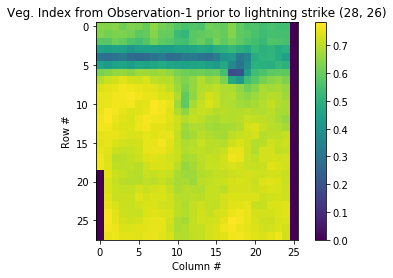

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import rasterio as rio
#Change file paths accordingly
setfilepath1 = './output/20190601_26.9852_-80.1487/PRE/20190524NDVI_crop.tif'
setfilepath2 = './output/20190601_26.9852_-80.1487/PRO/20190623NDVI_crop.tif'
with rio.open(setfilepath1) as src1:
    sample1 = src1.read(1, masked=True)
plt.imshow(sample1)
plt.colorbar()
plt.title('Veg. Index from Observation-1 prior to lightning strike {}'.format(sample1.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

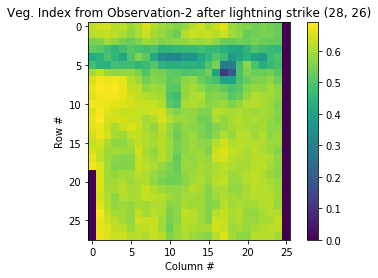

In [3]:
with rio.open(setfilepath2) as src2:
    sample2 = src2.read(1, masked=True)
plt.imshow(sample2)
plt.colorbar()
plt.title('Veg. Index from Observation-2 after lightning strike {}'.format(sample2.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

([array([ 9.,  0.,  2., 17.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  2., 26.]),
  array([ 0.,  0.,  4., 24.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  1.,  2., 25.]),
  array([ 0.,  1.,  5., 22.]),
  array([ 0.,  1.,  5., 22.]),
  array([ 0.,  0.,  4., 24.]),
  array([ 0.,  0.,  4., 24.]),
  array([ 0.,  0.,  4., 24.]),
  array([ 0.,  0.,  4., 24.]),
  array([ 0.,  0.,  4., 24.]),
  array([ 1.,  1.,  3., 23.]),
  array([ 0.,  2.,  5., 21.]),
  array([ 0.,  0.,  6., 22.]),
  array([ 0.,  0.,  2., 26.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  3., 25.]),
  array([ 0.,  0.,  4., 24.]),
  array([28.,  0.,  0.,  0.])],
 array([0.        , 0.17256692, 0.34513384, 0.5177008 , 0.6902677 ],
       dtype=float32),
 <a list of 26 Lists of Patches objects>)

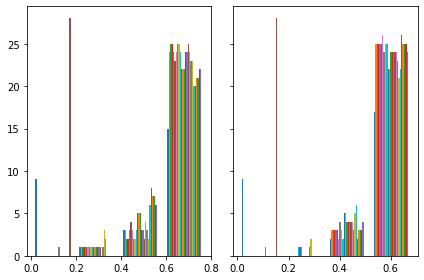

In [4]:
import numpy as np
N_points = 728
n_bins = 4

# Normal distribution
x = sample1
y = sample2

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
#print(sample1)
axs[0].hist(x, bins=n_bins)
axs[1].hist(y, bins=n_bins)

Text(0.5, 1.0, 'Diff (2019-05-19 - 2019-05-24)')

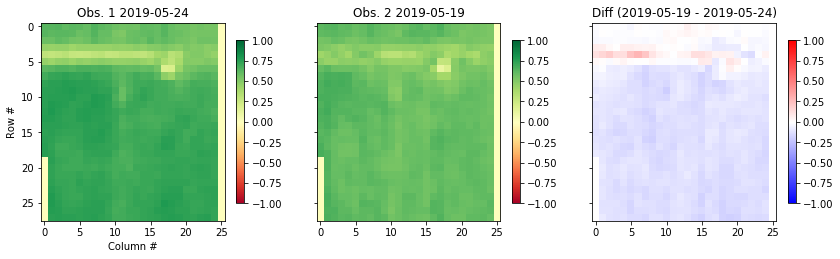

In [5]:
date = '2019-05-24'
date2 = '2019-05-19'
fig, axes = plt.subplots(1,3, figsize=(14,6), sharex=True, sharey=True)
plt.sca(axes[0])
plt.imshow(sample1, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Obs. 1 {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

plt.sca(axes[1])
plt.imshow(sample2, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Obs. 2 {}'.format(date2))

plt.sca(axes[2])
plt.imshow(sample2 - sample1, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar(shrink=0.5)
plt.title('Diff ({} - {})'.format(date2, date))

In [22]:
from scipy import stats as st
pixel_list1 = sample1.flatten()
st.describe(pixel_list1)

DescribeResult(nobs=728, minmax=(0.0, 0.7830793), mean=0.6339612, variance=0.032750655, skewness=-2.3664681911468506, kurtosis=5.221134917992112)

In [23]:
pixel_list2 = sample2.flatten()
st.describe(pixel_list2)

DescribeResult(nobs=728, minmax=(0.0, 0.6902677), mean=0.5483262, variance=0.020116827, skewness=-2.99773907661438, kurtosis=8.722533887940376)